/home/nate/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
/home/nate/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in ubyte_scalars
/home/nate/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in ubyte_scalars


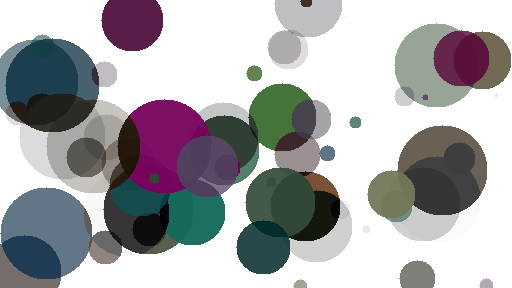

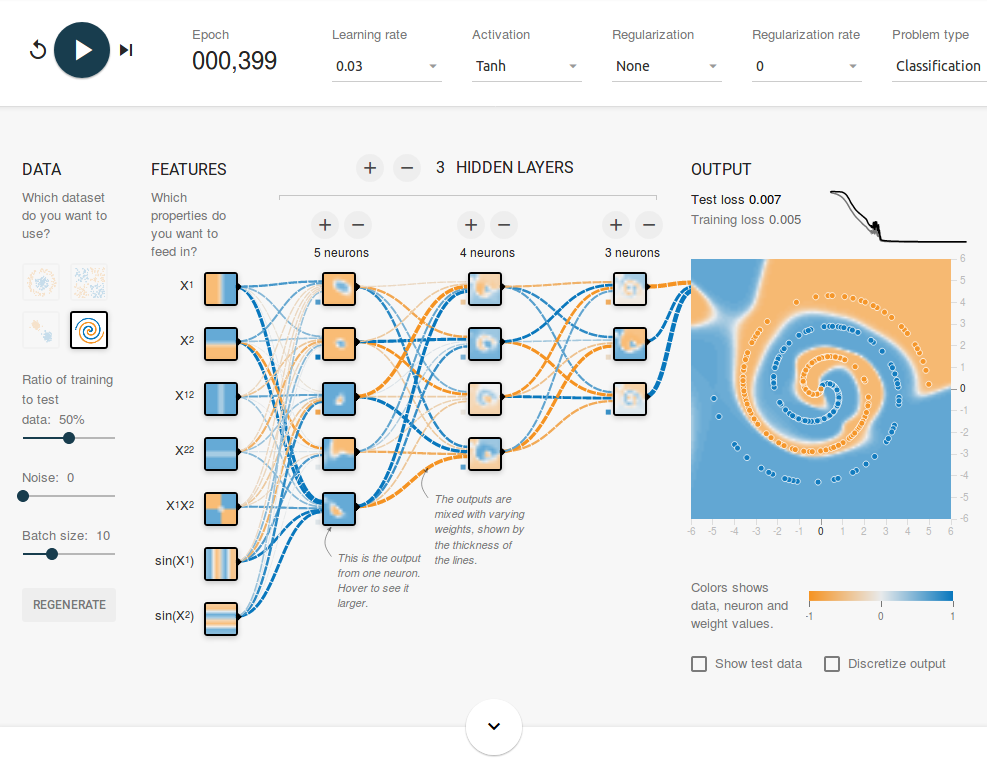

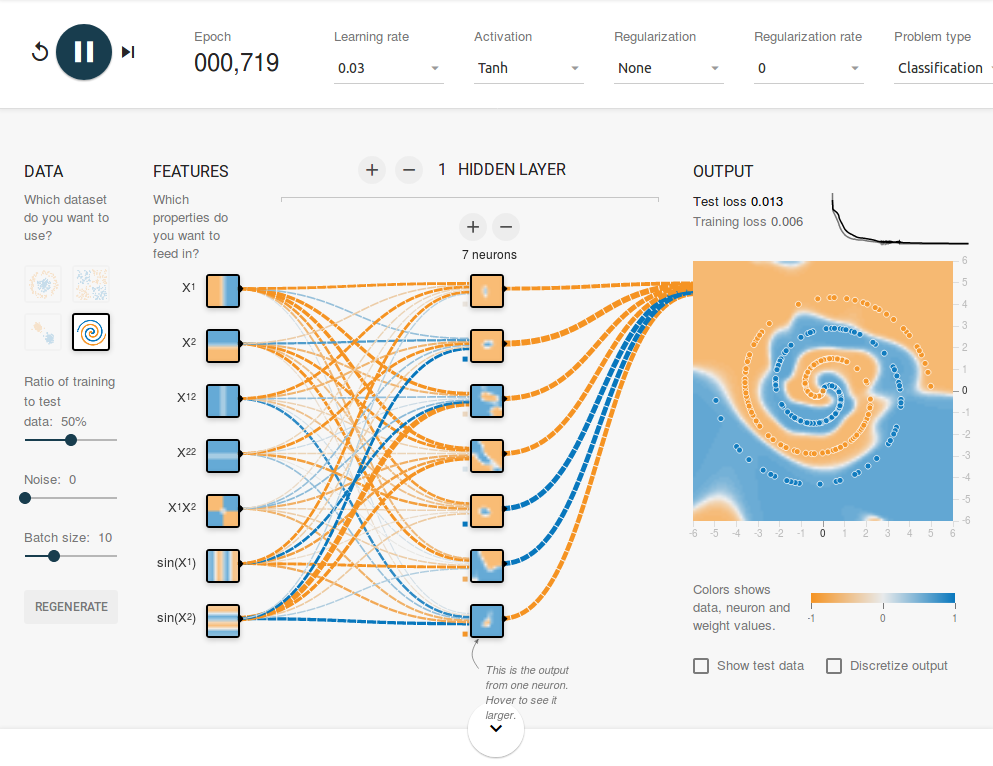

In [50]:
#import cairo
import numpy as np
from IPython.display import display, Image
from PIL.Image import fromarray
from StringIO import StringIO
import PIL.Image as PILImage

def nbimage(data):
    s = StringIO()
    fromarray(data).save(s,'png')
    display(Image(s.getvalue()))
    
WIDTH = 512
HEIGHT = 288
data = np.zeros((HEIGHT,WIDTH,4), dtype=numpy.uint8)

# Broken Cairo...
'''
ims = cairo.ImageSurface.create_for_data(data, cairo.FORMAT_ARGB3-2,WIDTH,HEIGHT)
cr = cairo.Context(ims)

cr.set_source_rgba(1.0,0.0,0.0,1.0)
cr.set_line_width(2.0)
cr.move_to(0.0,0.0)
cr.line_to(100.0,100.0)
cr.stroke()
'''

# As cairo is broken for me, I'm designing my own cirlce draw-er:
def draw_circle(data, x, y, radius, red, green, blue, alpha):
    xleft = x-radius
    xright = x+radius
    ytop = y-radius
    ybottom = y+radius
    if xleft < 0: xleft = 0
    if xright > WIDTH: xright = WIDTH #range function doesn't include endpoint
    if ytop < 0: ytop = 0
    if ybottom > HEIGHT: ybottom = HEIGHT

    for xi in range(xleft, xright):
        for yi in range(ytop, ybottom):
            if np.sqrt((x-xi)**2 + (y-yi)**2) <= radius:
                draw_pixel(data, xi, yi, red, green, blue, alpha)

# My own recipe for alpha mixing:
def draw_pixel(data, x, y, red, green, blue, alpha):
    aold = data[y][x][3]
    
    rold = data[y][x][0]*aold/255.0
    gold = data[y][x][1]*aold/255.0
    bold = data[y][x][2]*aold/255.0
    radd = red*alpha/255.0
    gadd = green*alpha/255.0
    badd = blue*alpha/255.0
    rnew = int((rold+radd)/2)
    gnew = int((gold+gadd)/2)
    bnew = int((bold+badd)/2)
    
    aadd = (255-aold)*alpha/255.0
    anew = int(aold+aadd)
    
    data[y][x][0] = rnew
    data[y][x][1] = gnew
    data[y][x][2] = bnew
    data[y][x][3] = anew

# Draw 50 circles:
# NOTE: Circles wouldn't be anything too fancy, except that I built it myself!
MAX_RADIUS = 48
for c in range(60):
    draw_circle(data, np.random.randint(WIDTH), np.random.randint(HEIGHT),
                np.random.randint(MAX_RADIUS), np.random.randint(256),
                np.random.randint(256), np.random.randint(256),
                np.random.randint(256))
    
# Blue washout test:
'''for xi in range(WIDTH):
    for yi in range(HEIGHT):
        data[yi][xi][2] = 255
        data[yi][xi][3] = 255'''
                
nbimage(data)

data = PILImage.open('Pictures/playground.png')
display(data)

data = PILImage.open('Pictures/playground2.png')
display(data)